# AR MODEL SIMULATION

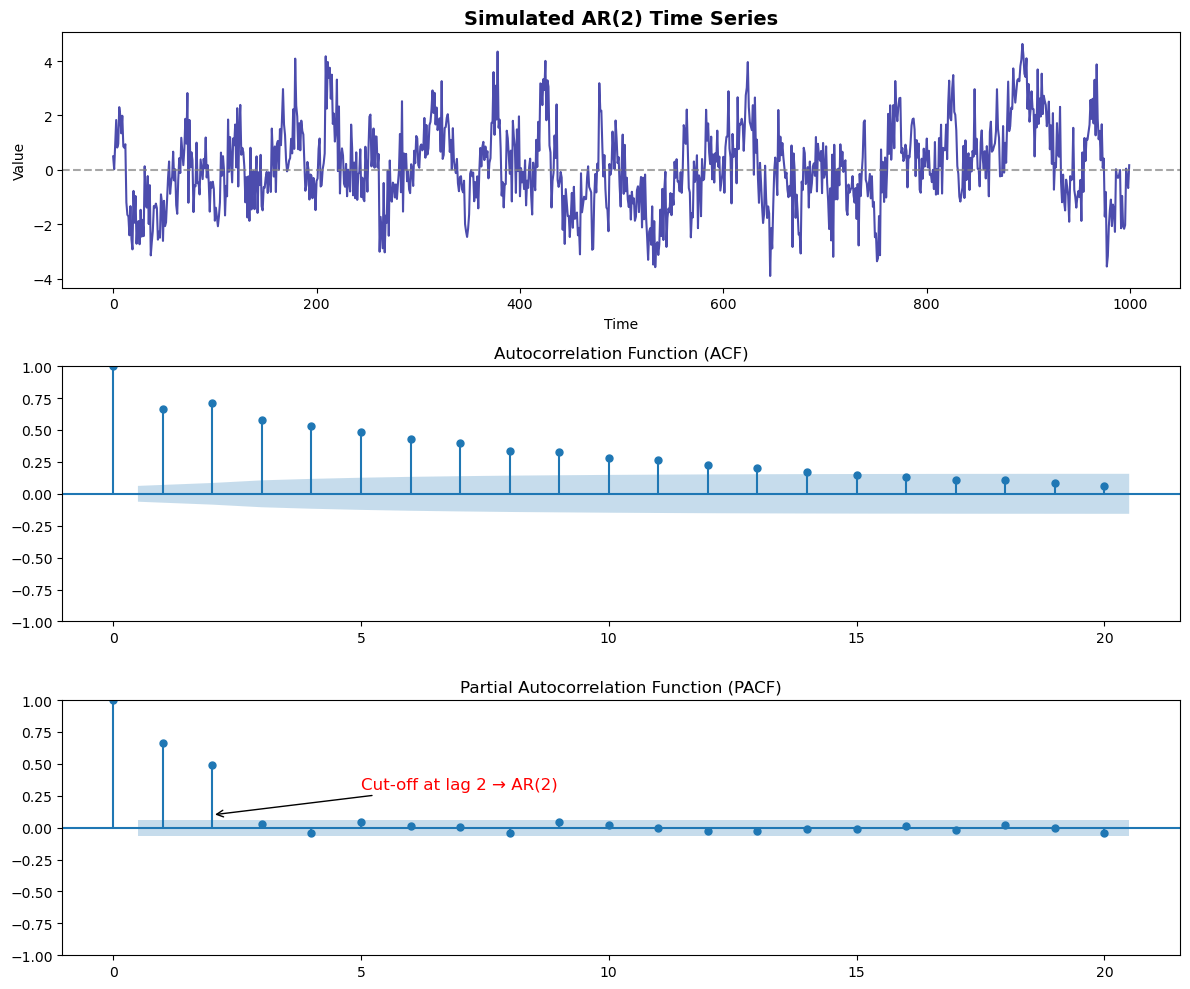

In [12]:


from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define AR(2) process parameters
ar2_params = np.array([1, -0.33, -0.50])  # AR coefficients
ma_params = np.array([1])  # MA(0), just 1

# Generate AR(2) process sample
np.random.seed(42)
AR2_process = ArmaProcess(ar2_params, ma_params).generate_sample(nsample=1000)

# Create figure for simulation, ACF, and PACF plots
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot the simulated AR(2) time series
axes[0].plot(AR2_process, color='darkblue', alpha=0.7, linewidth=1.5)
axes[0].set_title("Simulated AR(2) Time Series", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")
axes[0].axhline(y=0, linestyle="--", color="gray", alpha=0.7)

# Plot ACF
sm.graphics.tsa.plot_acf(AR2_process, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title("Autocorrelation Function (ACF)")

# Plot PACF with annotation for cut-off
sm.graphics.tsa.plot_pacf(AR2_process, lags=20, ax=axes[2], alpha=0.05, method="ywm")
axes[2].set_title("Partial Autocorrelation Function (PACF)")
axes[2].annotate("Cut-off at lag 2 → AR(2)", xy=(2, 0.1), xytext=(5, 0.3),
                 arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

# Adjust layout
plt.tight_layout()
plt.show()



# MA MODEL SIMULATION

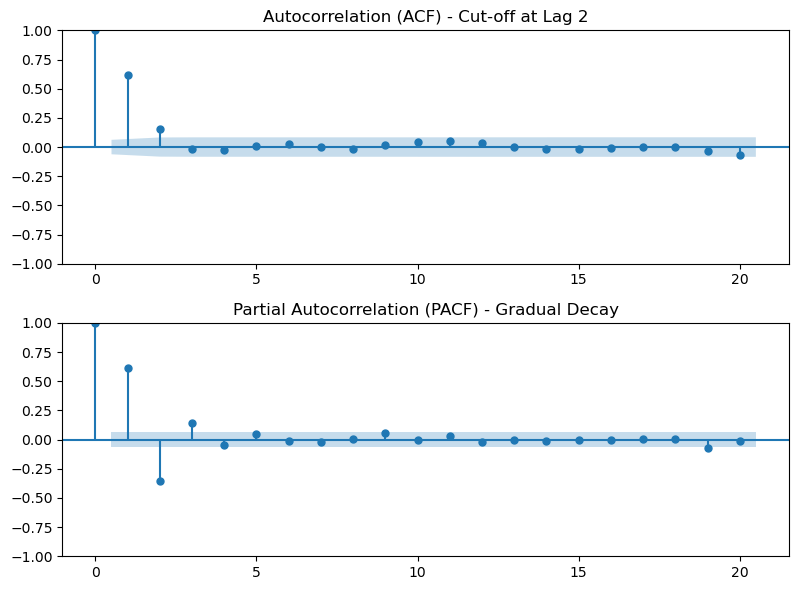

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Define MA(2) process parameters
ma2 = np.array([1, 0.9, 0.3])  # MA(2): θ1 = 0.9, θ2 = 0.3
ar2 = np.array([1, 0, 0])      # AR(0): No AR component

# Generate the MA(2) process sample
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

# Create figure for ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot ACF (cut-off at lag 2 for MA(2))
sm.graphics.tsa.plot_acf(MA2_process, lags=20, ax=axes[0], alpha=0.05)
axes[0].set_title("Autocorrelation (ACF) - Cut-off at Lag 2")

# Plot PACF (gradual decay for MA(2))
sm.graphics.tsa.plot_pacf(MA2_process, lags=20, ax=axes[1], alpha=0.05, method="ywm")
axes[1].set_title("Partial Autocorrelation (PACF) - Gradual Decay")

# Adjust layout
plt.tight_layout()
plt.show()



# ARMA MODEL SIMULATION

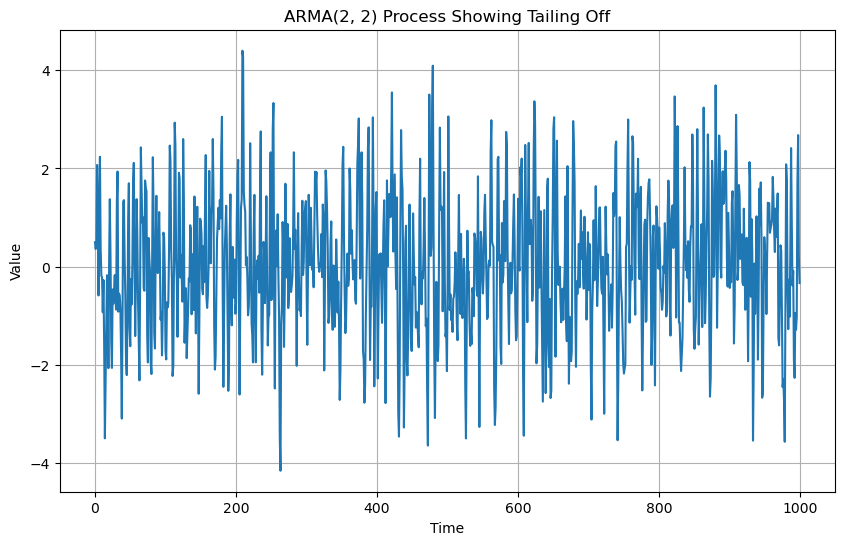

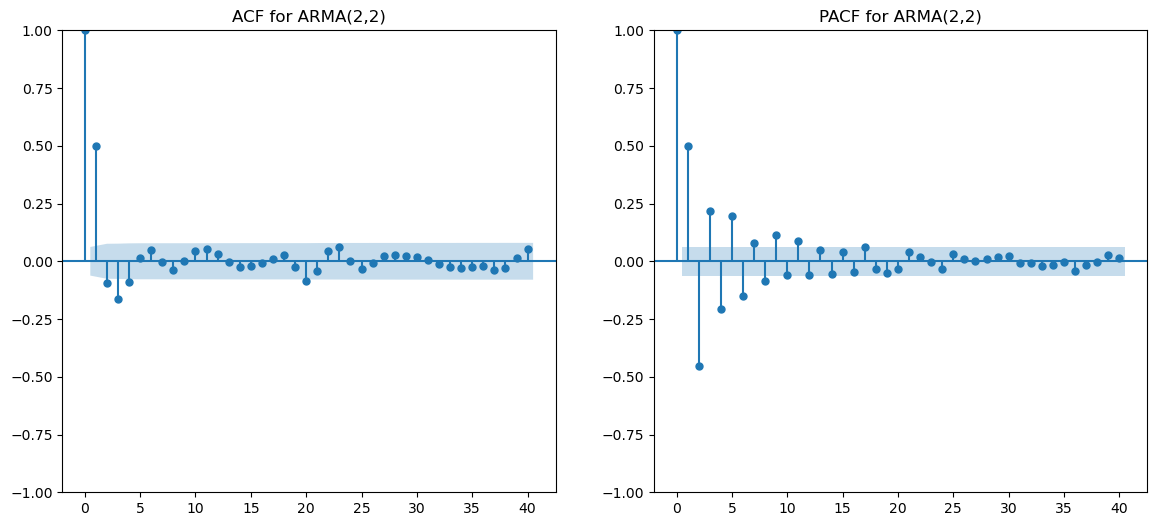

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARMA(2,2) example with parameters to show tailing off behavior
ar = np.array([1, -0.5, 0.2])  # AR(2)
ma = np.array([1, 0.5, -0.3])  # MA(2)

# Define the ARMA process
arma_process = ArmaProcess(ar, ma)

# Generate 1000 points
np.random.seed(42)
simulated_data = arma_process.generate_sample(nsample=1000)

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(simulated_data)
plt.title('ARMA(2, 2) Process Showing Tailing Off')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(simulated_data, lags=40, ax=axes[0])
axes[0].set_title('ACF for ARMA(2,2)')

plot_pacf(simulated_data, lags=40, ax=axes[1])
axes[1].set_title('PACF for ARMA(2,2)')

plt.show()